In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/devtlv/DailyChallenge-DataAnalysis-W6D5-Mobile_Price_Classification/main/train.csv'
df = pd.read_csv(url)

df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)
print(df.head())
print(df.info())
print(df.describe())
print(df.dtypes)

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_


Central Tendency Measures:
battery_power: Mean=1238.5185, Median=1226.0, Mode=618
blue: Mean=0.495, Median=0.0, Mode=0
clock_speed: Mean=1.52225, Median=1.5, Mode=0.5
dual_sim: Mean=0.5095, Median=1.0, Mode=1
fc: Mean=4.3095, Median=3.0, Mode=0
four_g: Mean=0.5215, Median=1.0, Mode=1
int_memory: Mean=32.0465, Median=32.0, Mode=27
m_dep: Mean=0.50175, Median=0.5, Mode=0.1
mobile_wt: Mean=140.249, Median=141.0, Mode=182
n_cores: Mean=4.5205, Median=4.0, Mode=4
pc: Mean=9.9165, Median=10.0, Mode=10
px_height: Mean=645.108, Median=564.0, Mode=347
px_width: Mean=1251.5155, Median=1247.0, Mode=874
ram: Mean=2124.213, Median=2146.5, Mode=1229
sc_h: Mean=12.3065, Median=12.0, Mode=17
sc_w: Mean=5.767, Median=5.0, Mode=1
talk_time: Mean=11.011, Median=11.0, Mode=7
three_g: Mean=0.7615, Median=1.0, Mode=1
touch_screen: Mean=0.503, Median=1.0, Mode=1
wifi: Mean=0.507, Median=1.0, Mode=1
price_range: Mean=1.5, Median=1.5, Mode=0

Variability Analysis:
battery_power: Range=1497, Variance=193088.35

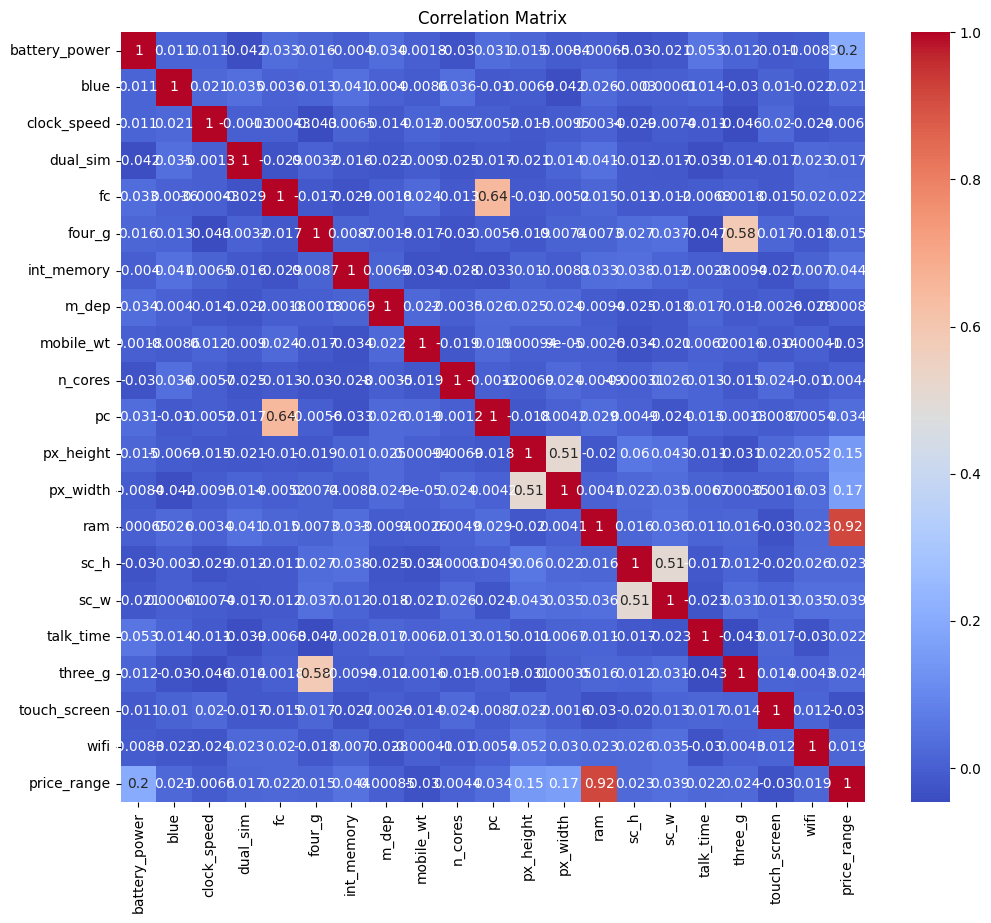


 SciPy:
battery_power: Shapiro-Wilk Test Statistic=0.9518834352493286, P-value=4.0106132155695427e-25
battery_power: Levene Test Statistic=5.6084733392664115, P-value=0.0007921156471206256
battery_power: Chi-Squared Test Statistic=3415.4666666666667, P-value=0.04740658115416354, Degrees of Freedom=3279
blue: Shapiro-Wilk Test Statistic=0.6365631818771362, P-value=0.0
blue: Levene Test Statistic=0.021308054038762337, P-value=0.9957815415035407
blue: Chi-Squared Test Statistic=1.432143214321432, P-value=0.6980177809451273, Degrees of Freedom=3
clock_speed: Shapiro-Wilk Test Statistic=0.9112281203269958, P-value=1.136153126294158e-32
clock_speed: Levene Test Statistic=2.7909540227168144, P-value=0.039174178947139315
clock_speed: Chi-Squared Test Statistic=65.26354165000753, P-value=0.7814696005897379, Degrees of Freedom=75
dual_sim: Shapiro-Wilk Test Statistic=0.6364651322364807, P-value=0.0
dual_sim: Levene Test Statistic=0.5001130402120537, P-value=0.6822354536835513
dual_sim: Chi-Squa

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Central Tendency Measures: Calculates mean, median, and mode for each feature.
print("\nCentral Tendency Measures:")
for col in df.columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    print(f"{col}: Mean={mean}, Median={median}, Mode={mode}")

# Variability Analysis: Computes range, variance, and standard deviation for each feature.
print("\nVariability Analysis:")
for col in df.columns:
    range_ = df[col].max() - df[col].min()
    variance = df[col].var()
    std_dev = df[col].std()
    print(f"{col}: Range={range_}, Variance={variance}, Standard Deviation={std_dev}")

# Distribution Shapes: Evaluates skewness and kurtosis for each feature to understand the distribution.
print("\nDistribution Shapes:")
for col in df.columns:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"{col}: Skewness={skewness}, Kurtosis={kurtosis}")

# Hypothesis Testing: Uses ANOVA (F-test) to determine if there are statistically significant differences between groups (price ranges) for each feature.
print("\nHypothesis Testing:")
price_range_groups = df.groupby('price_range')
for col in df.columns:
    if col != 'price_range':
        f_val, p_val = stats.f_oneway(*(group[col].values for name, group in price_range_groups))
        print(f"{col}: F-value={f_val}, P-value={p_val}")

# Feature-Target Correlations: Calculates and visualizes the correlation matrix to understand the relationship between features and the target variable.
print("\nFeature-Target Correlations:")
correlations = df.corr()
print(correlations['price_range'])

# Correlation Matrix: A table showing correlation coefficients between variables, indicating the strength and direction of their relationships.
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


print("\n SciPy:")
for col in df.columns:
    if col != 'price_range':
        # Shapiro-Wilk Test: Tests for normality of each feature.
        shapiro_stat, shapiro_p = stats.shapiro(df[col])
        print(f"{col}: Shapiro-Wilk Test Statistic={shapiro_stat}, P-value={shapiro_p}")

        # Levene Test: Tests for homogeneity of variances across different price ranges.
        levene_stat, levene_p = stats.levene(*(group[col].values for name, group in price_range_groups))
        print(f"{col}: Levene Test Statistic={levene_stat}, P-value={levene_p}")

        # Chi-Squared Test: Tests for independence between each feature and the target variable.
        contingency_table = pd.crosstab(df[col], df['price_range'])
        chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"{col}: Chi-Squared Test Statistic={chi2_stat}, P-value={chi2_p}, Degrees of Freedom={dof}")

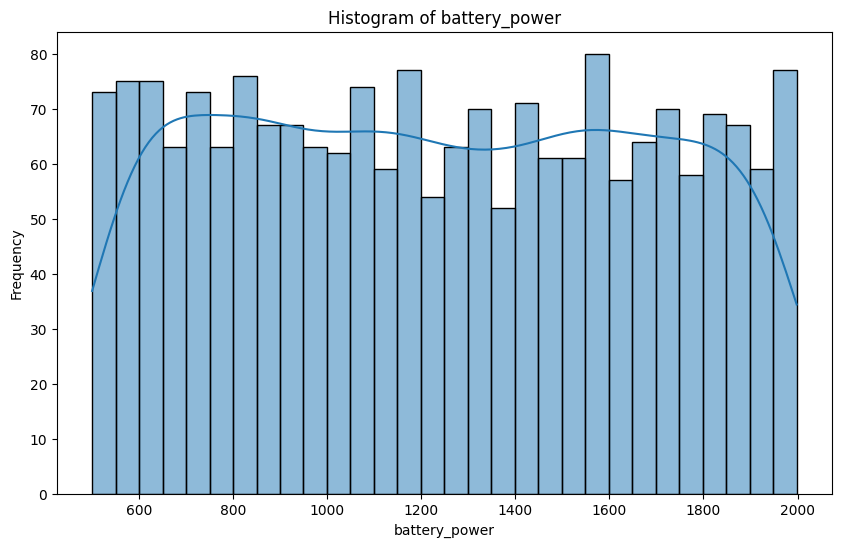

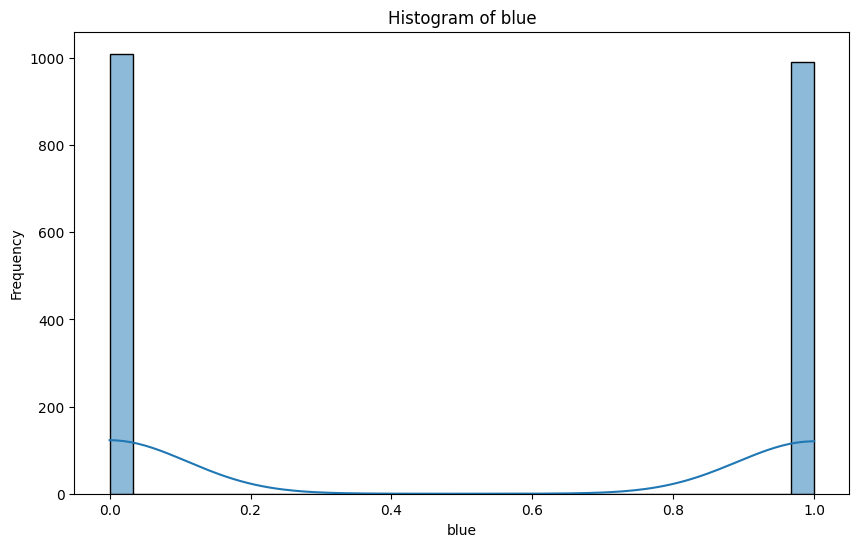

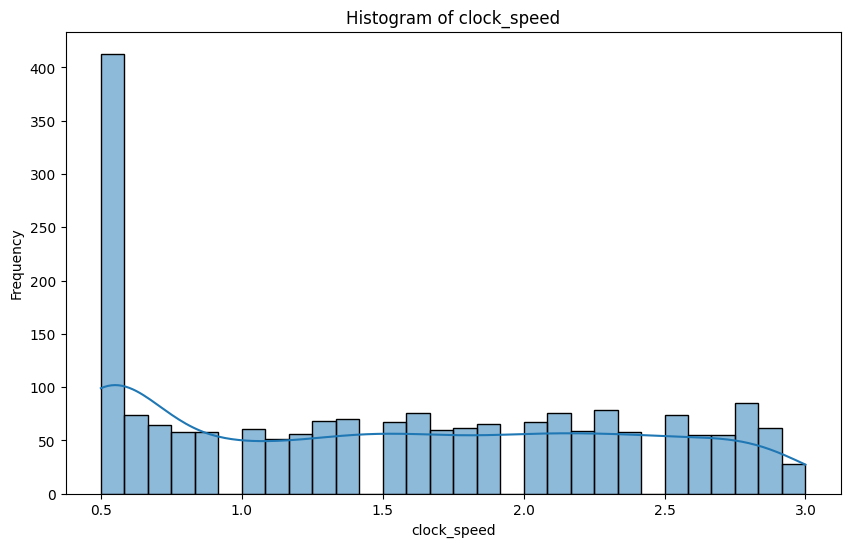

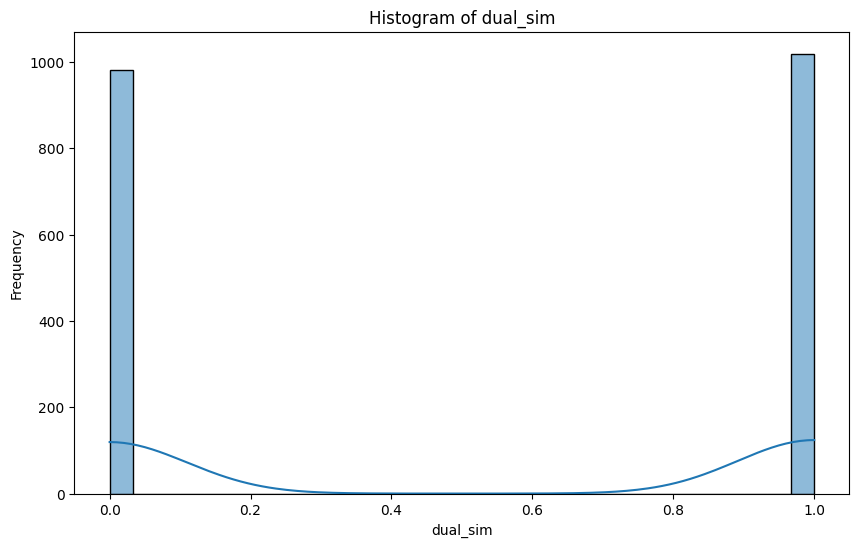

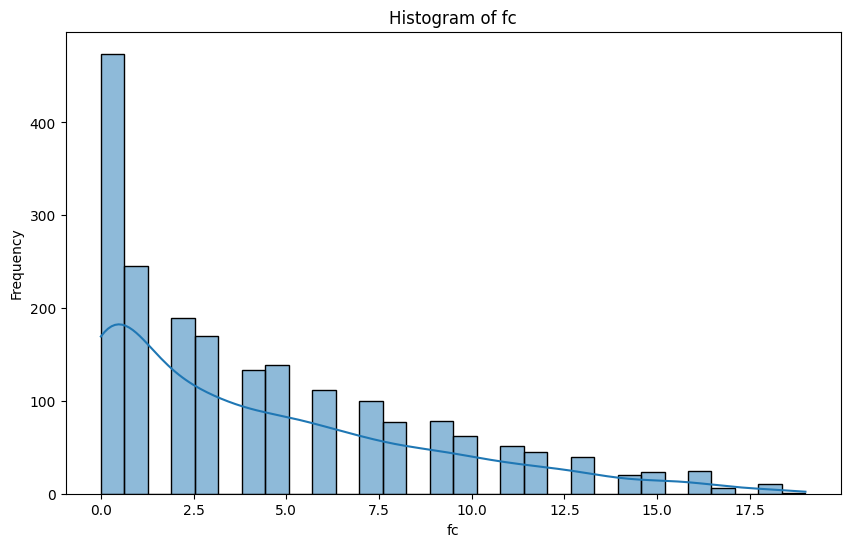

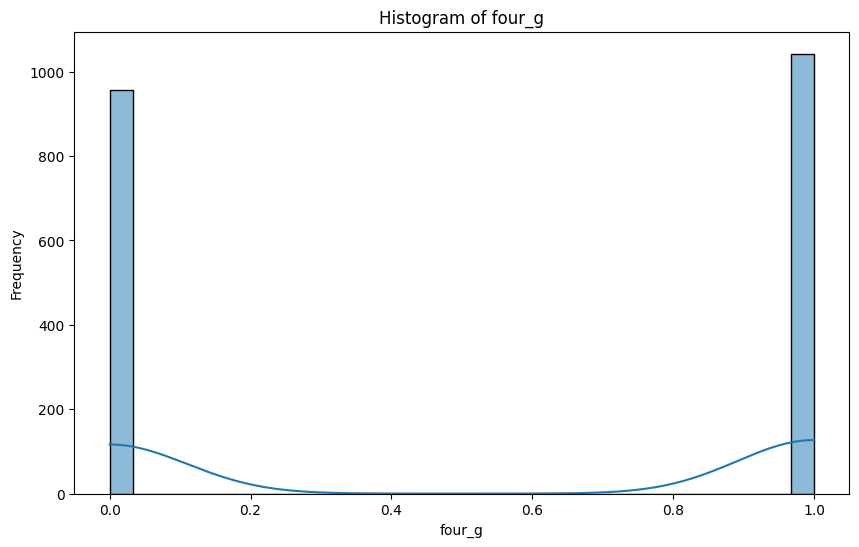

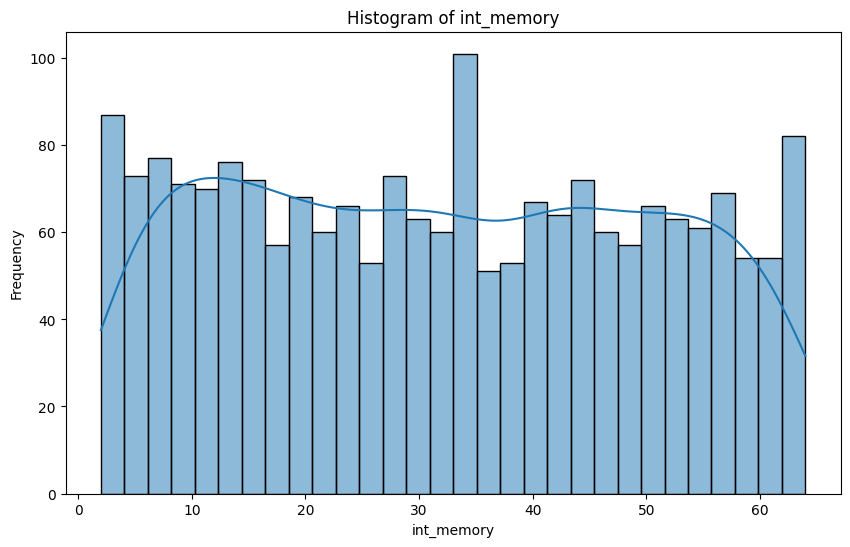

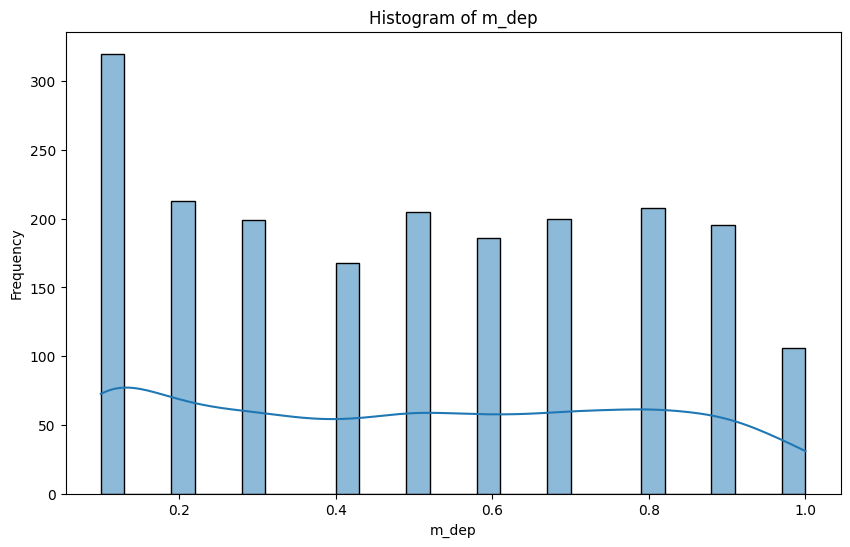

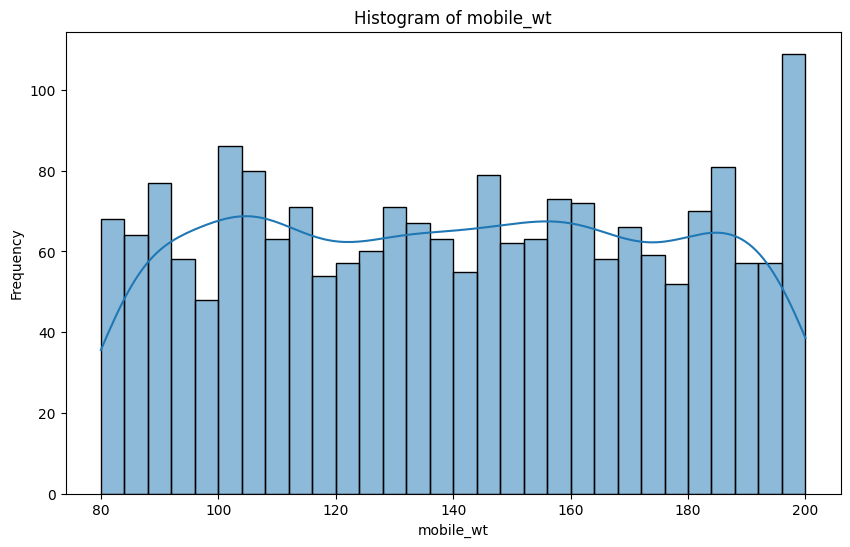

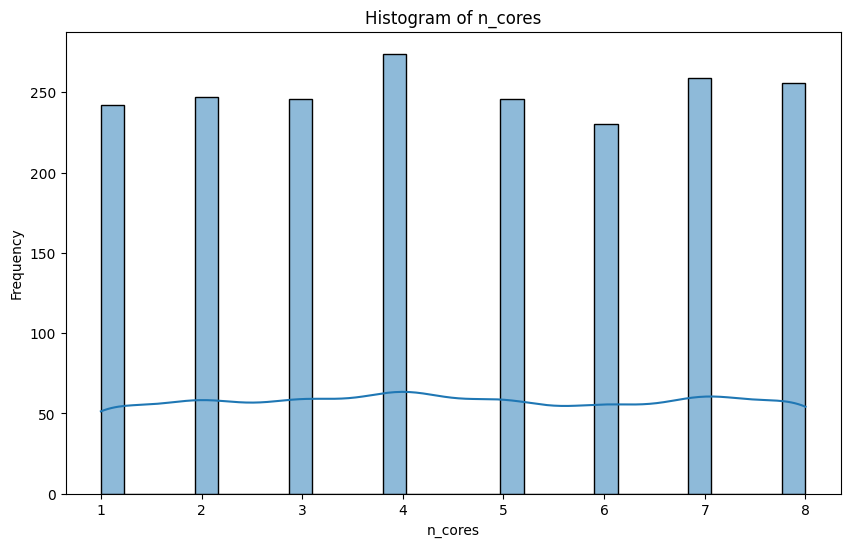

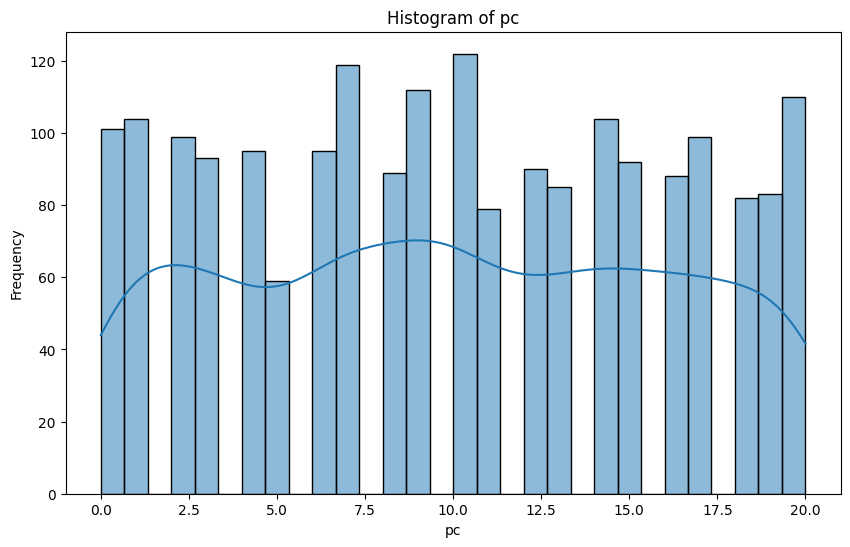

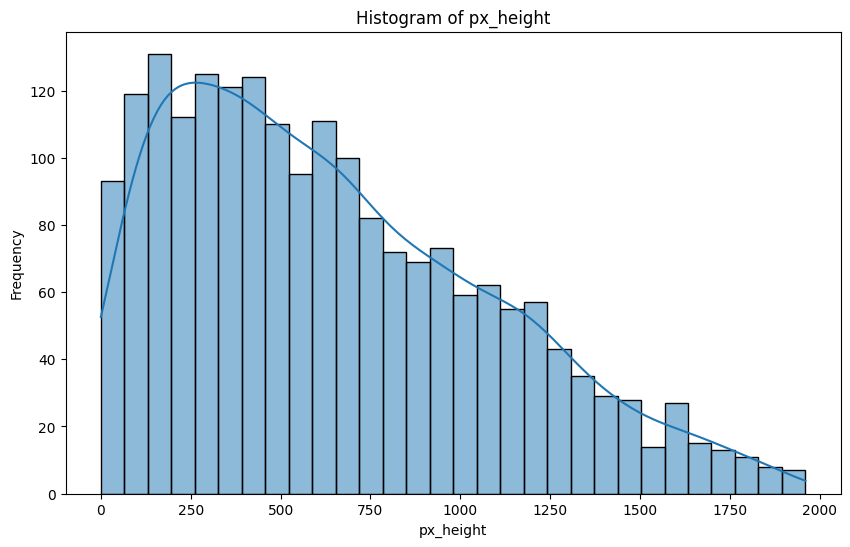

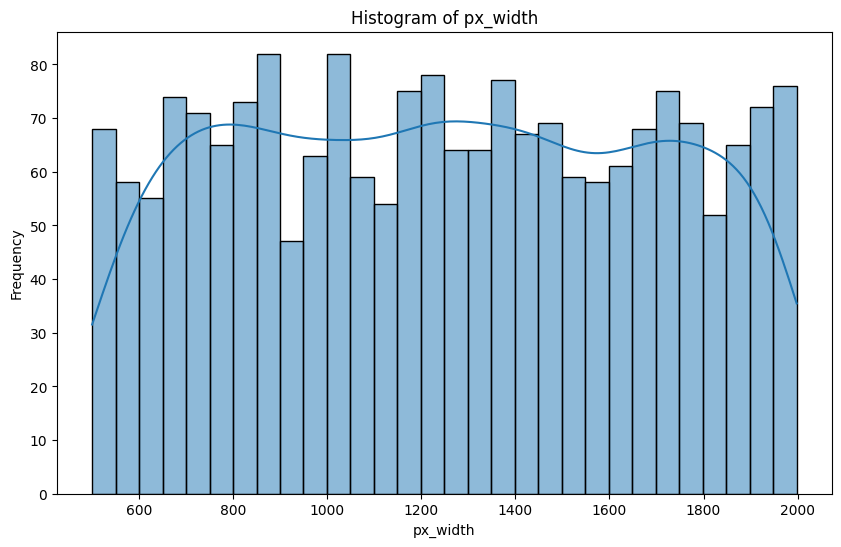

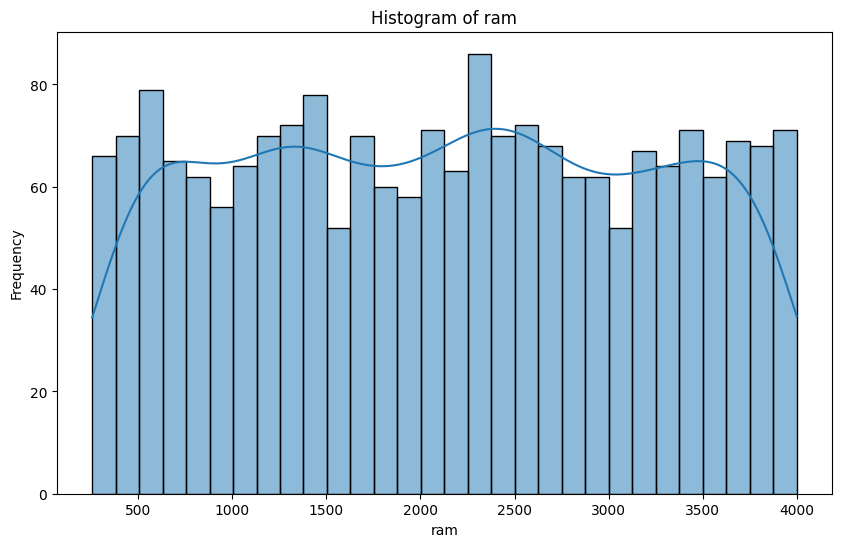

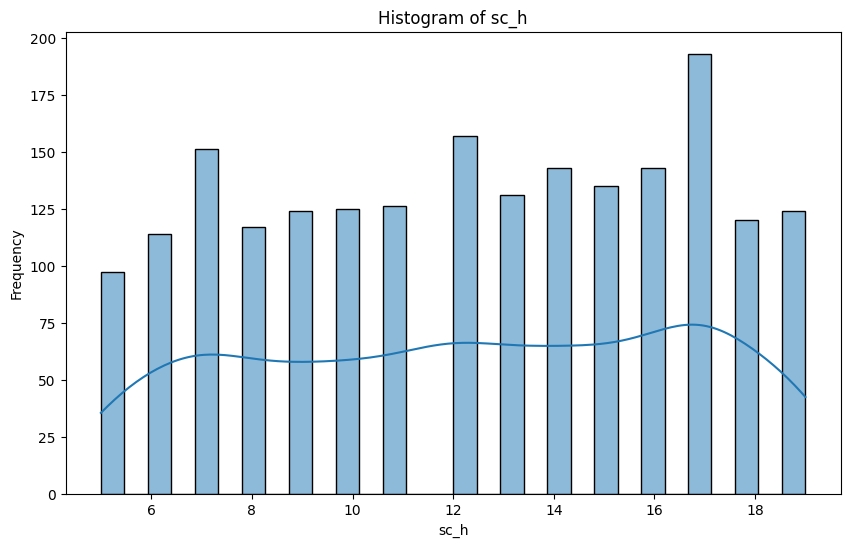

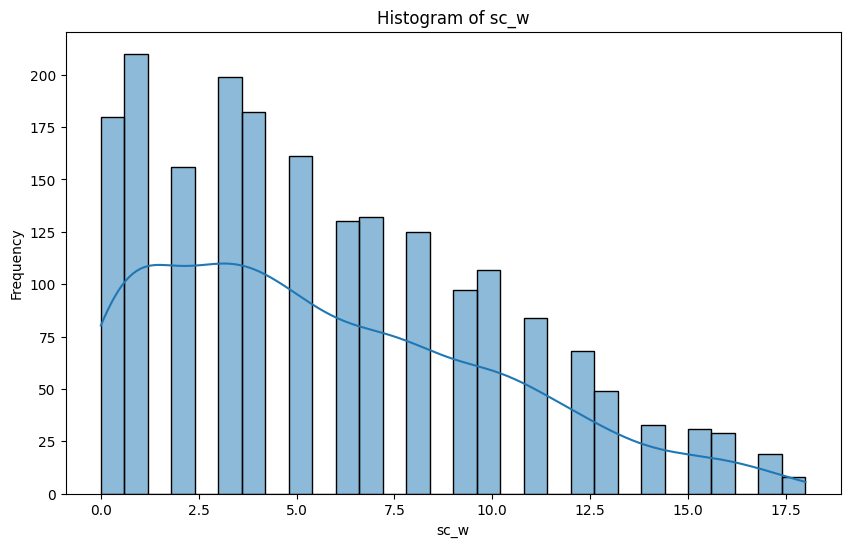

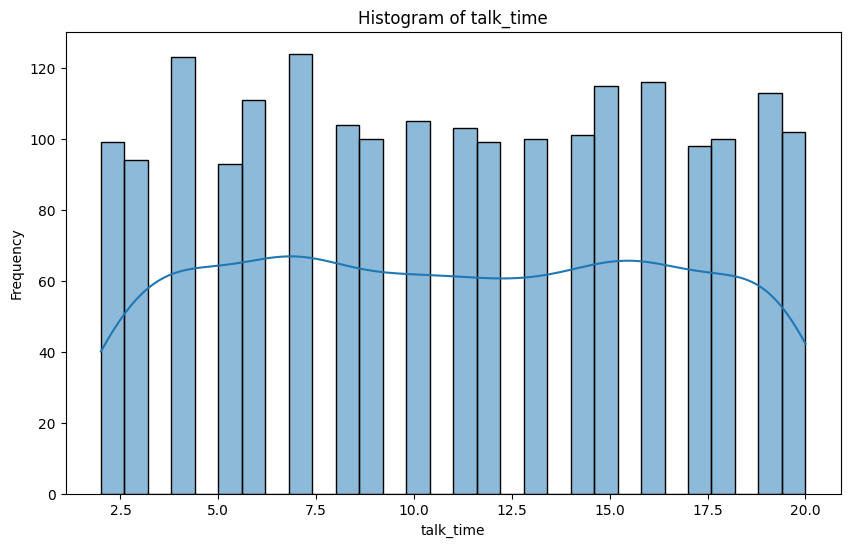

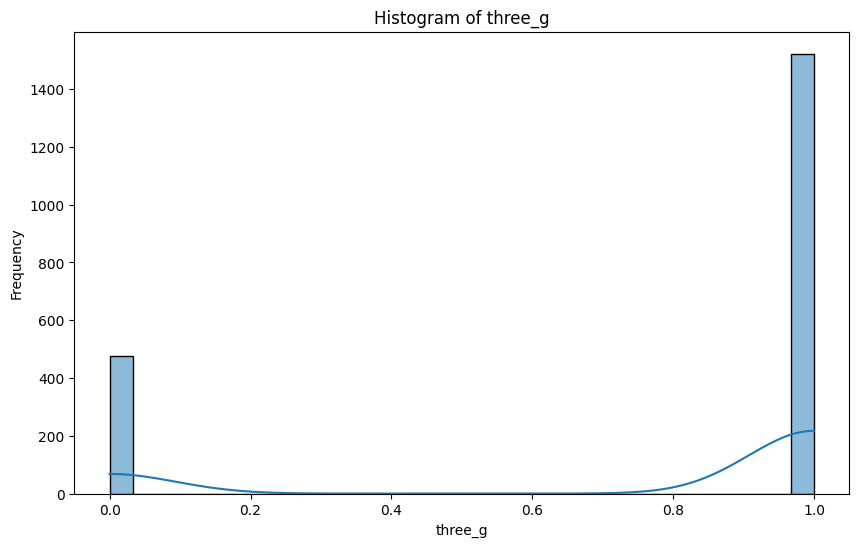

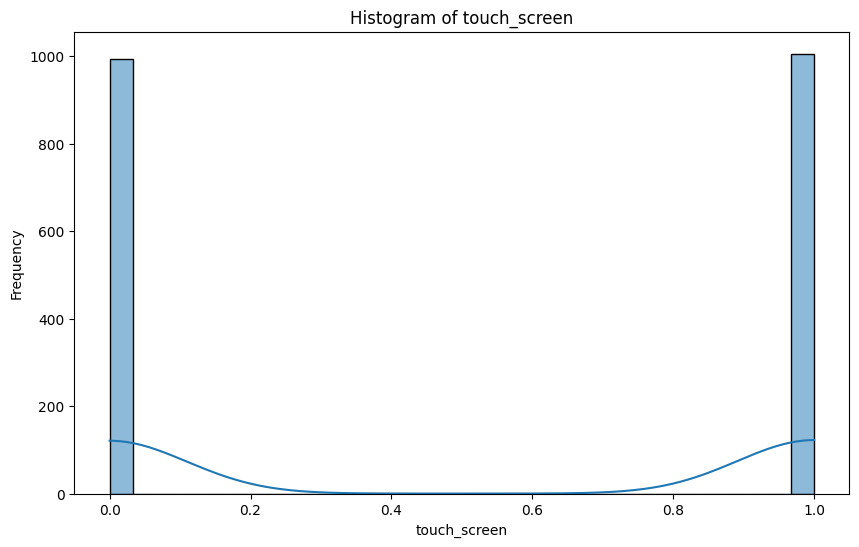

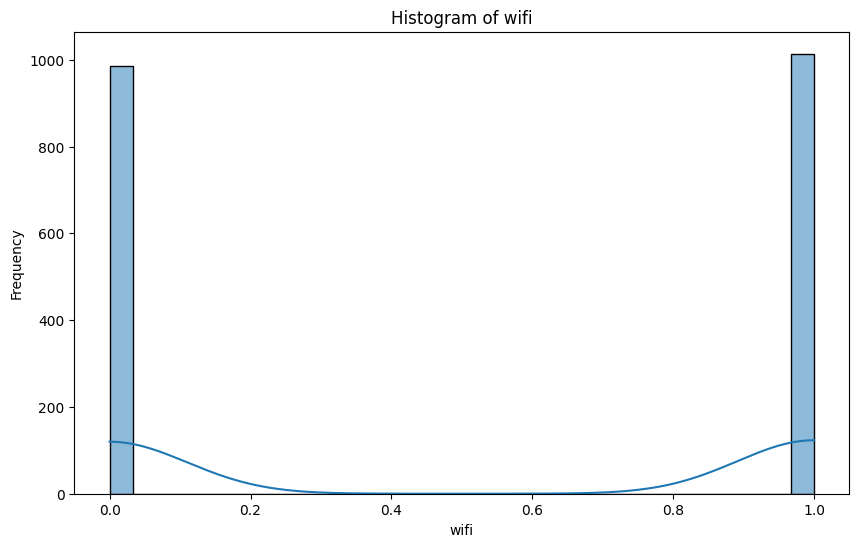

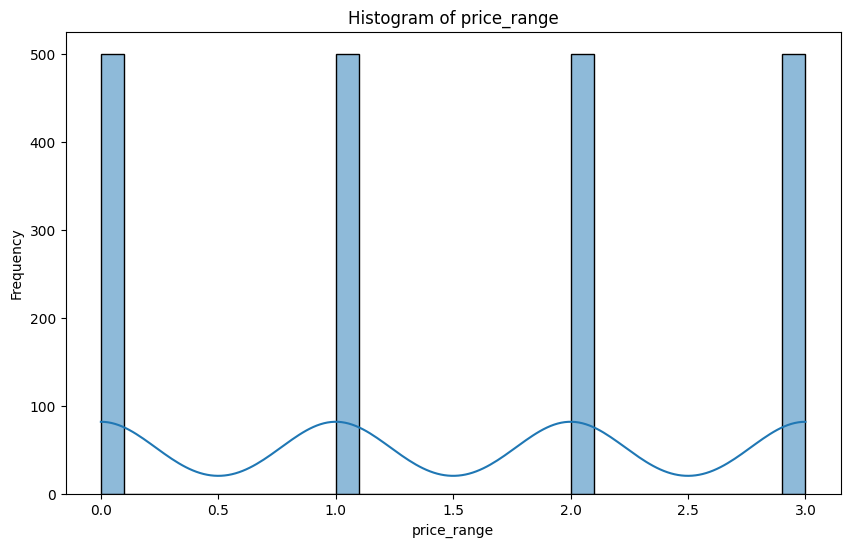

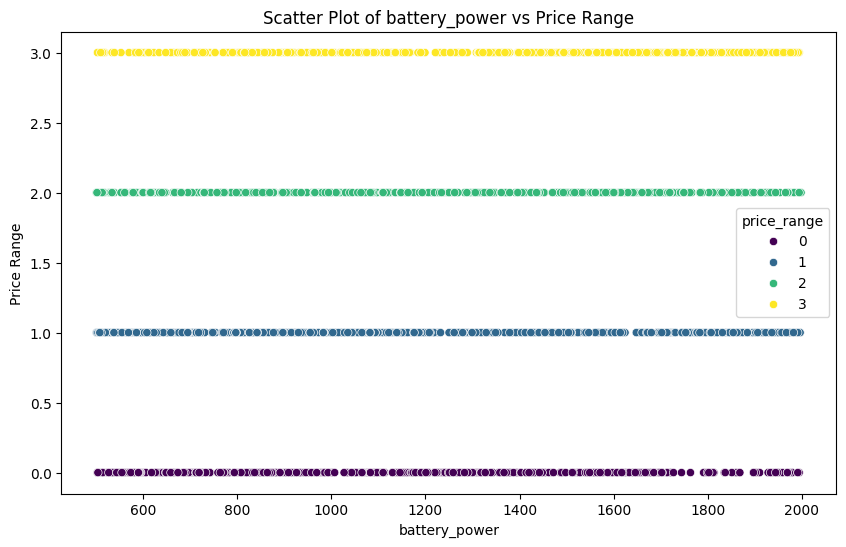

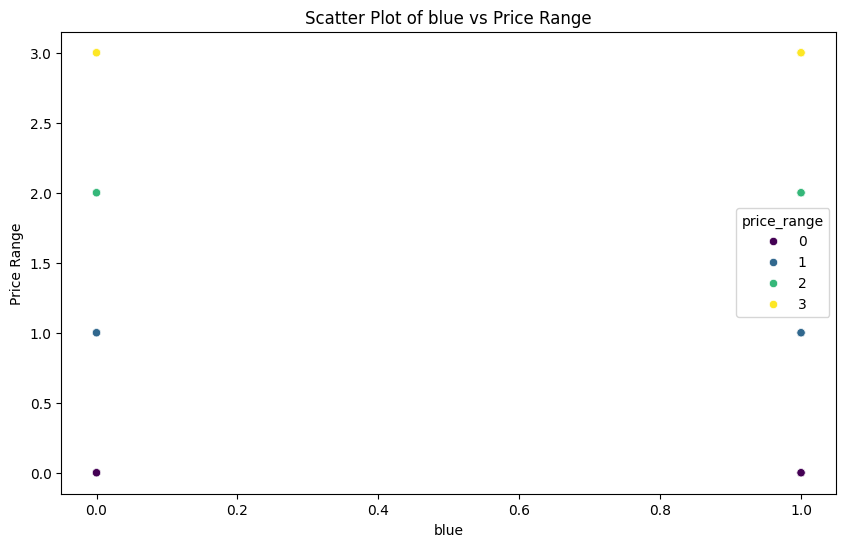

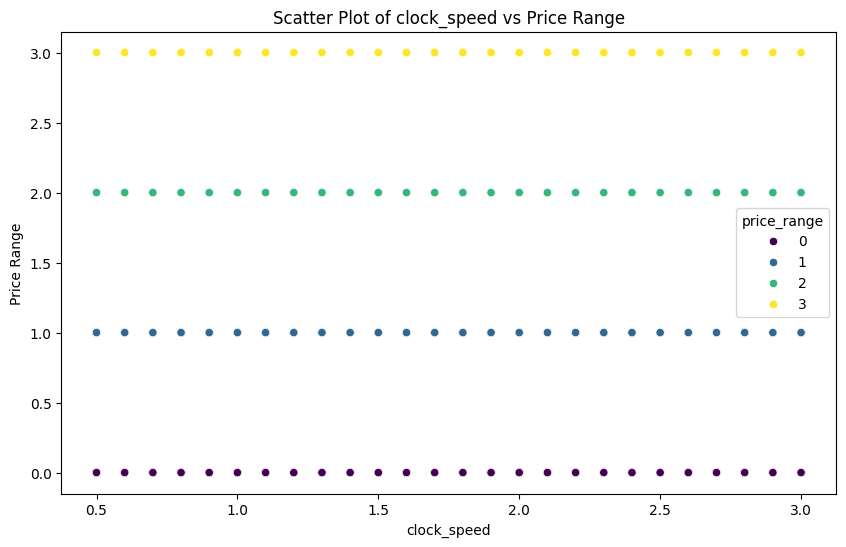

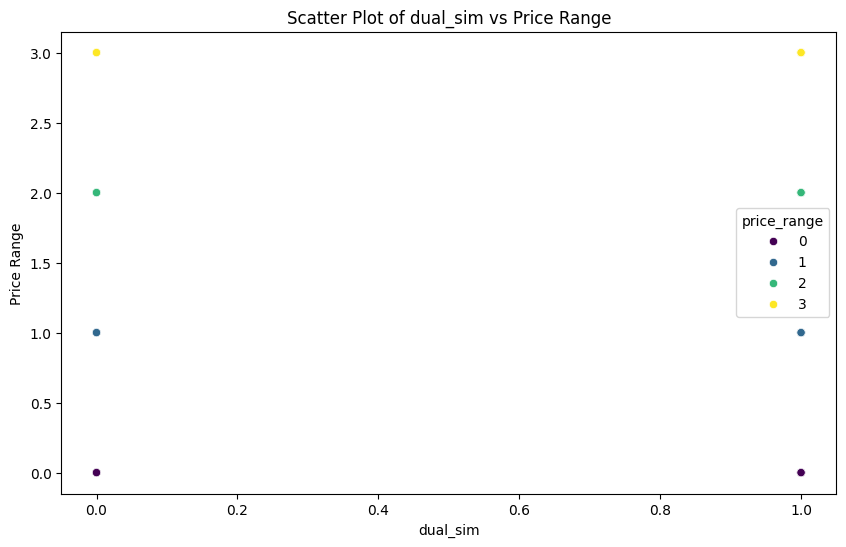

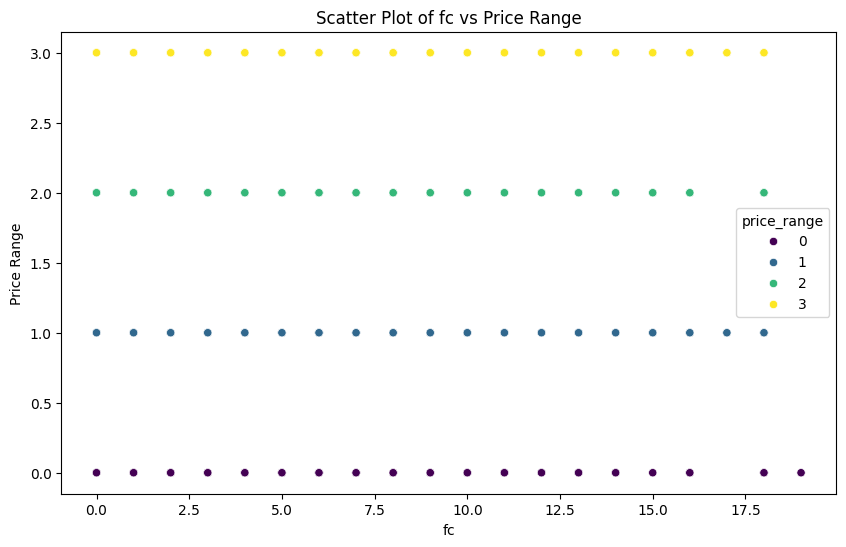

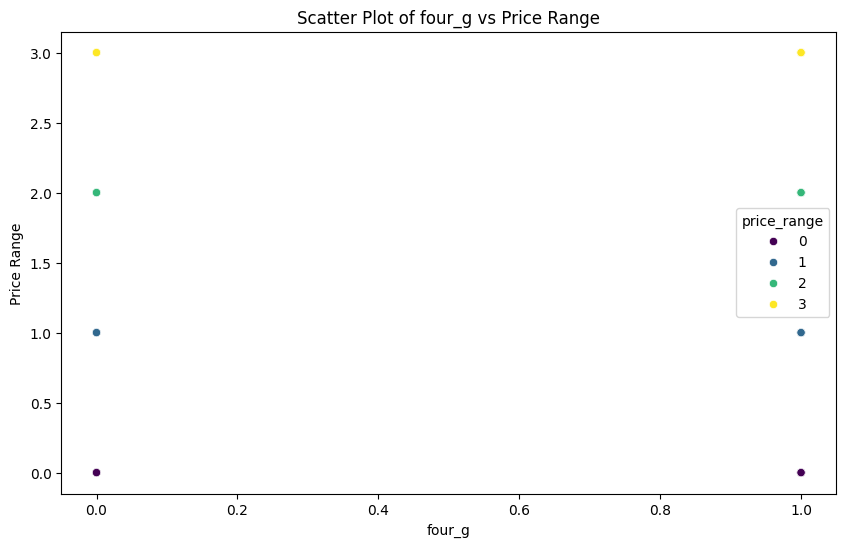

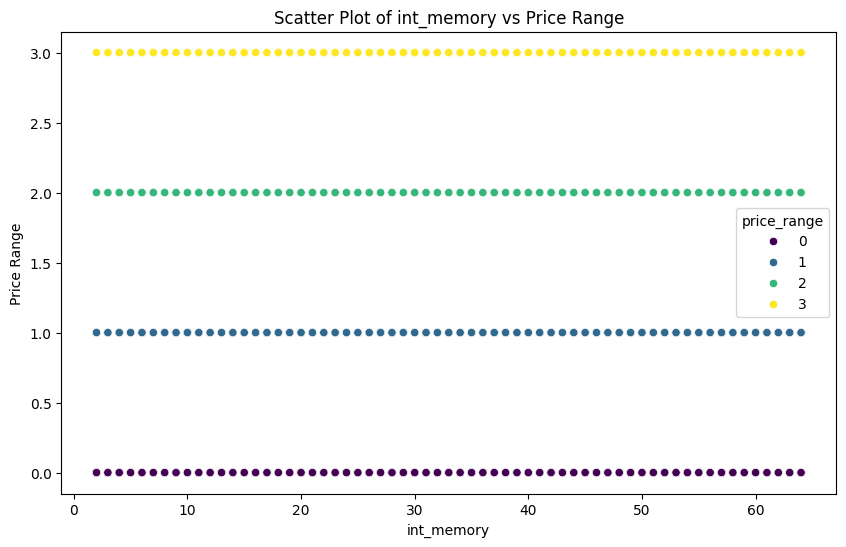

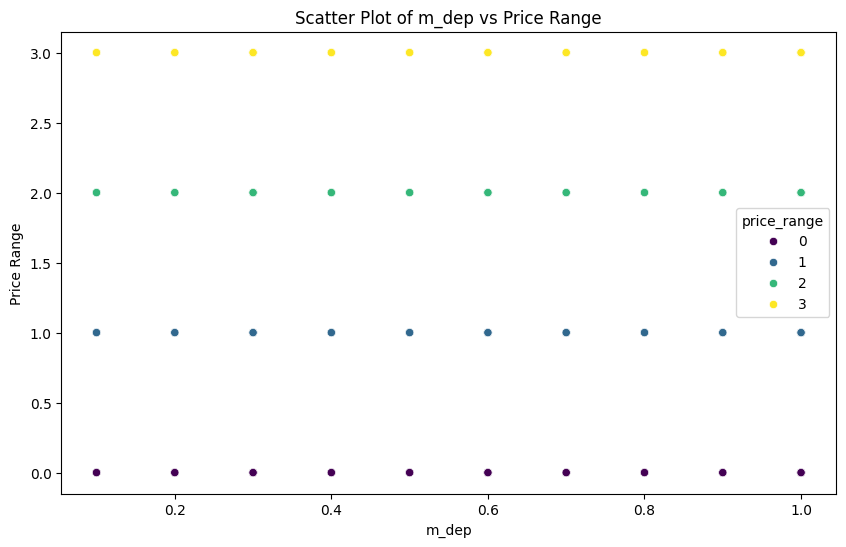

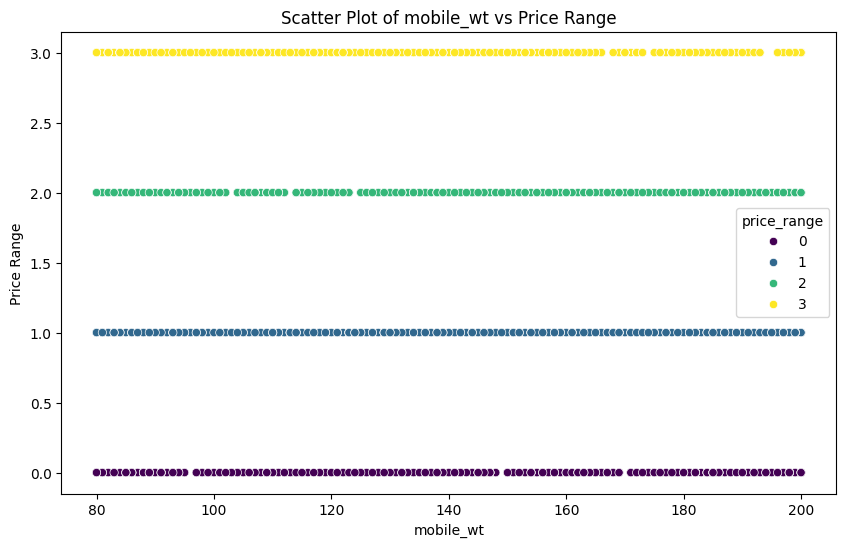

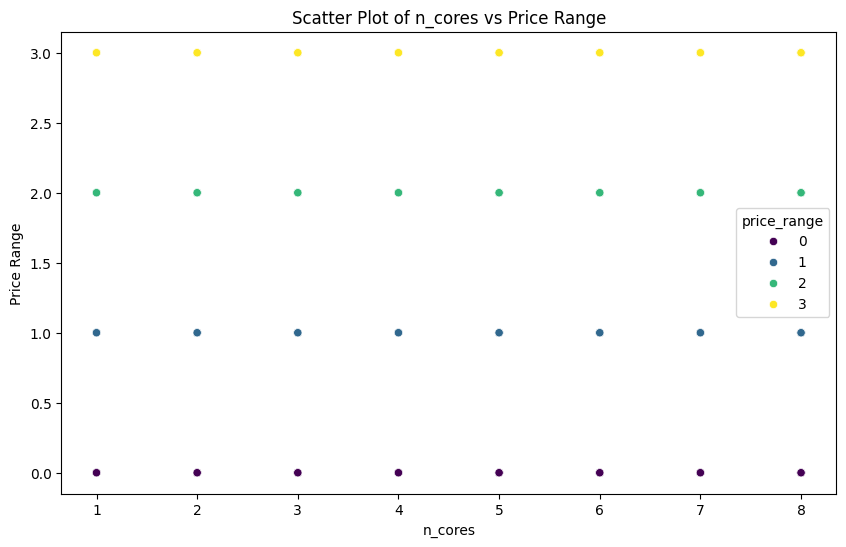

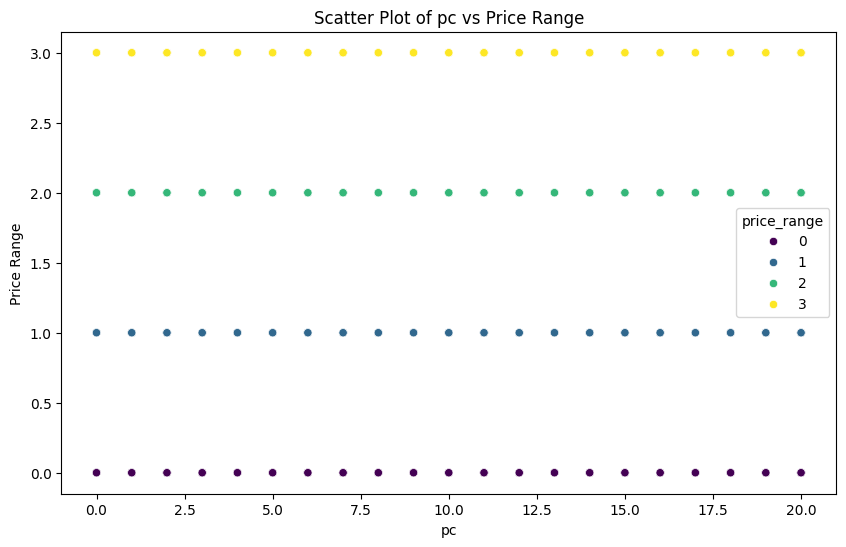

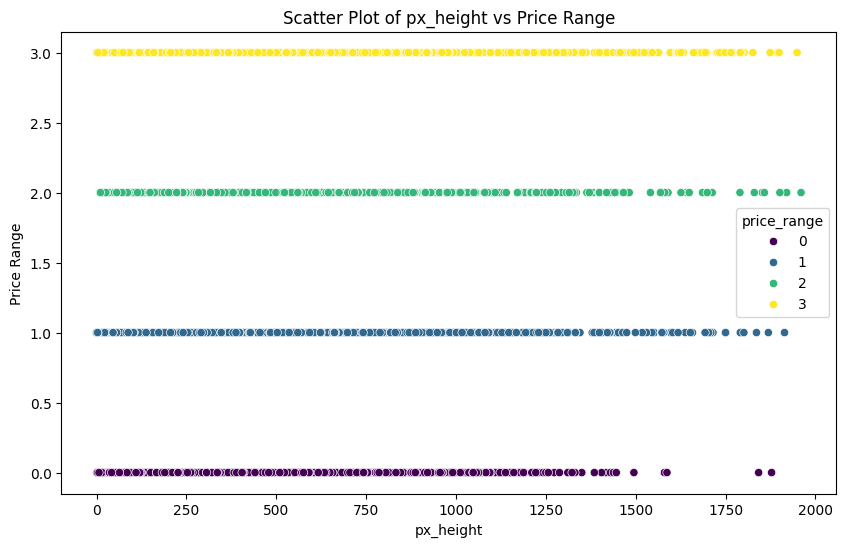

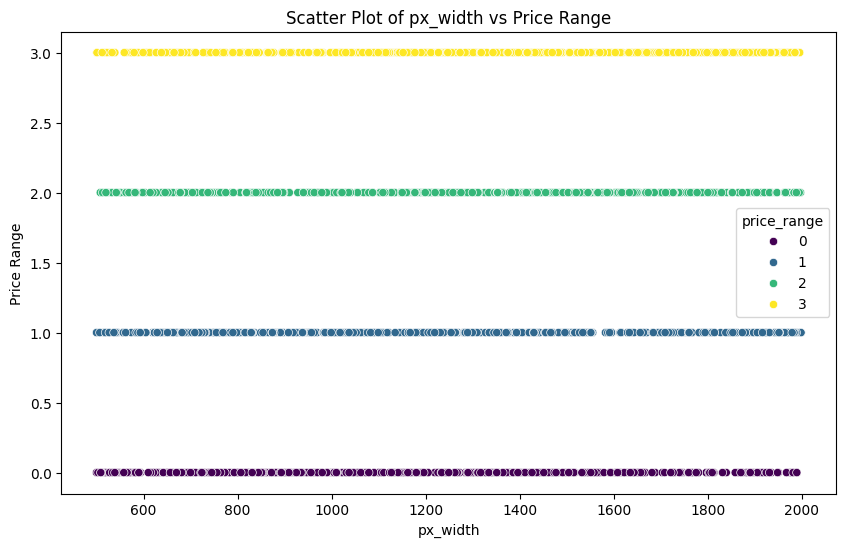

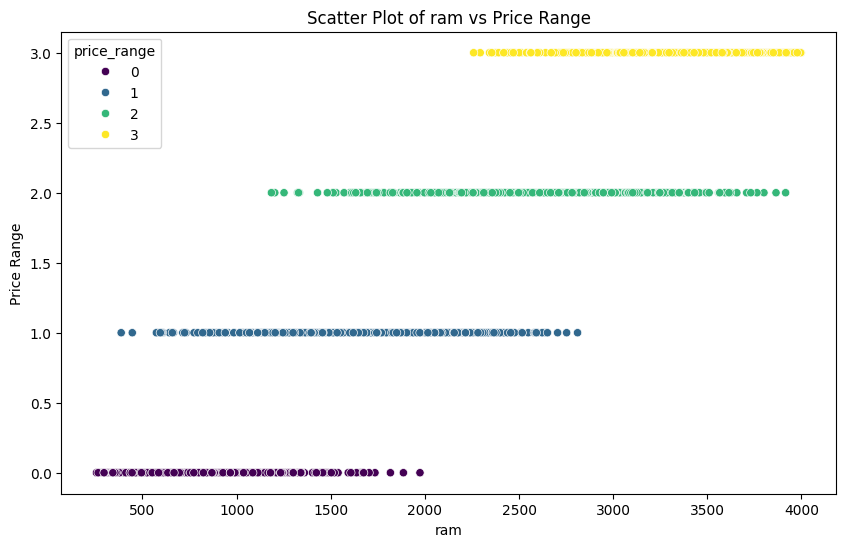

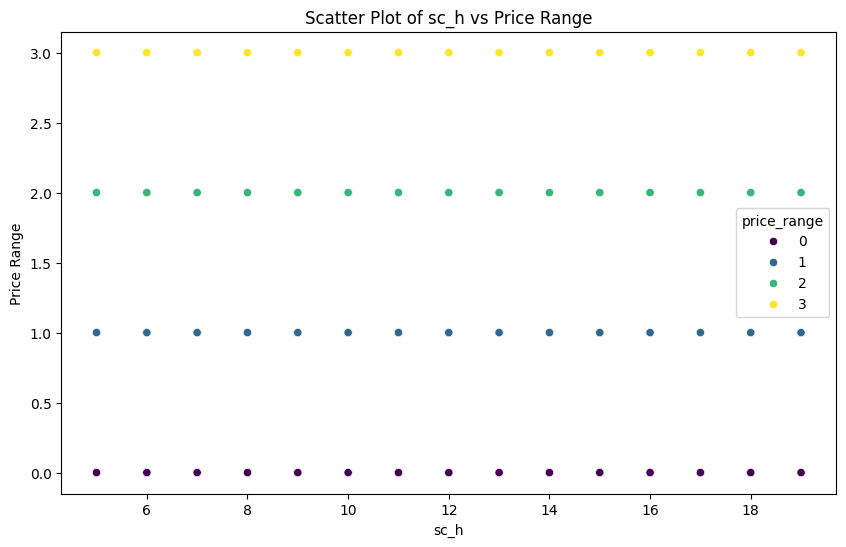

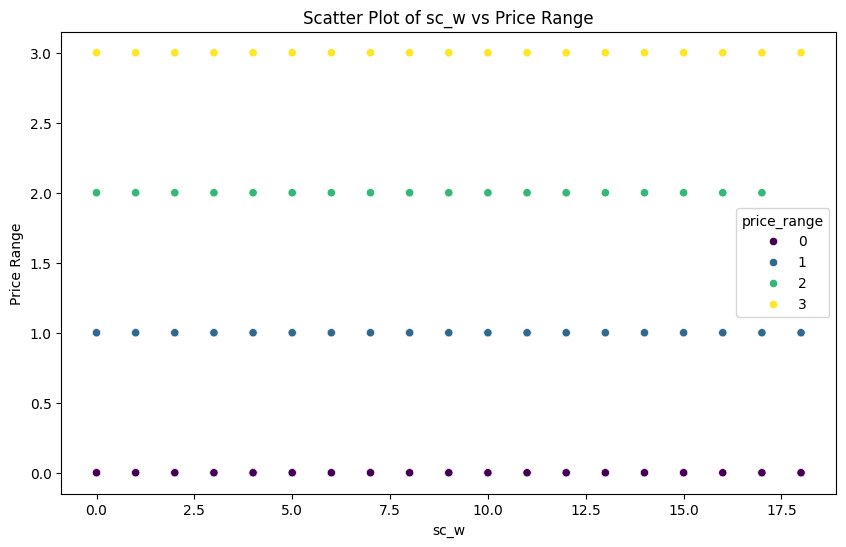

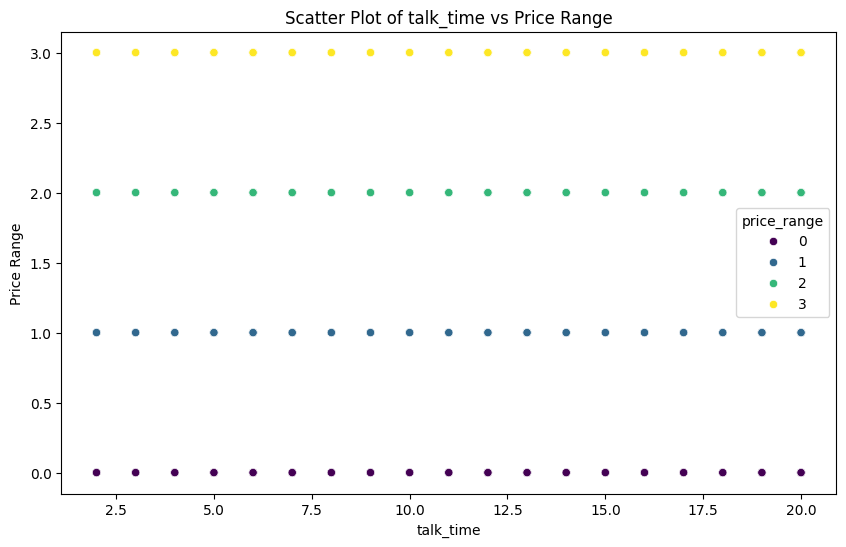

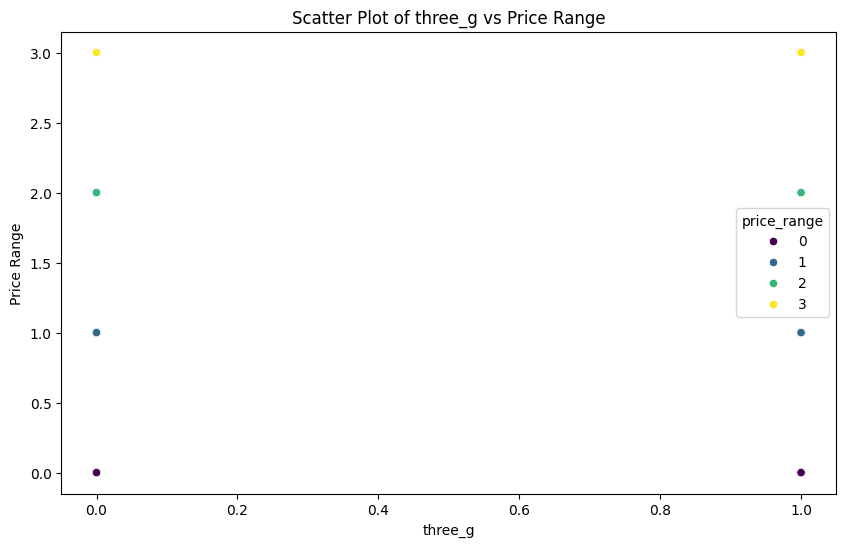

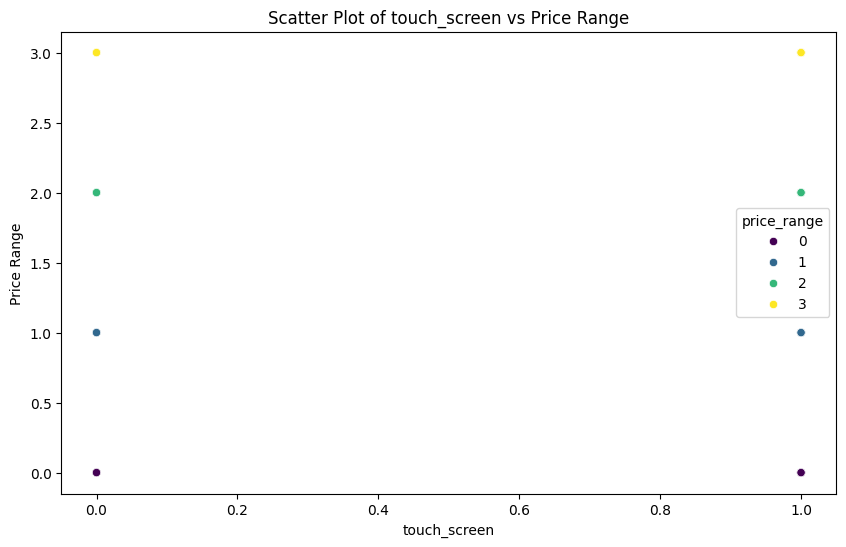

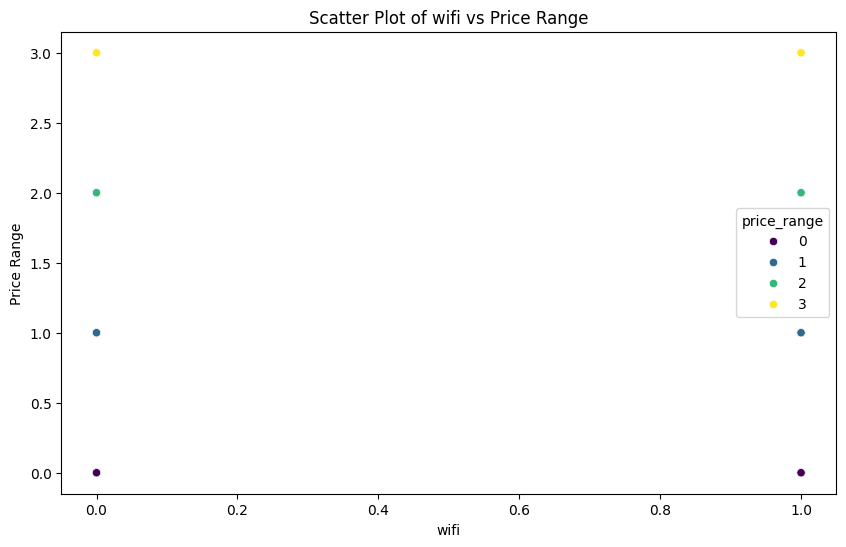

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


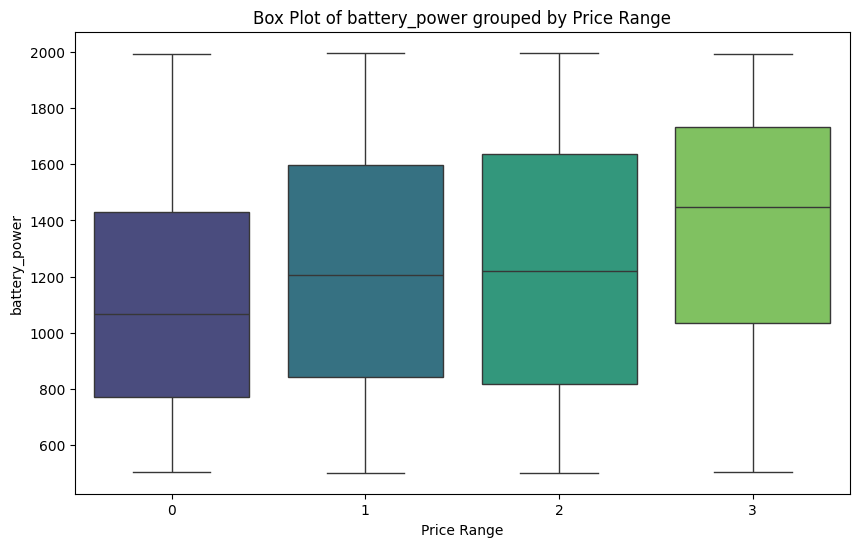

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


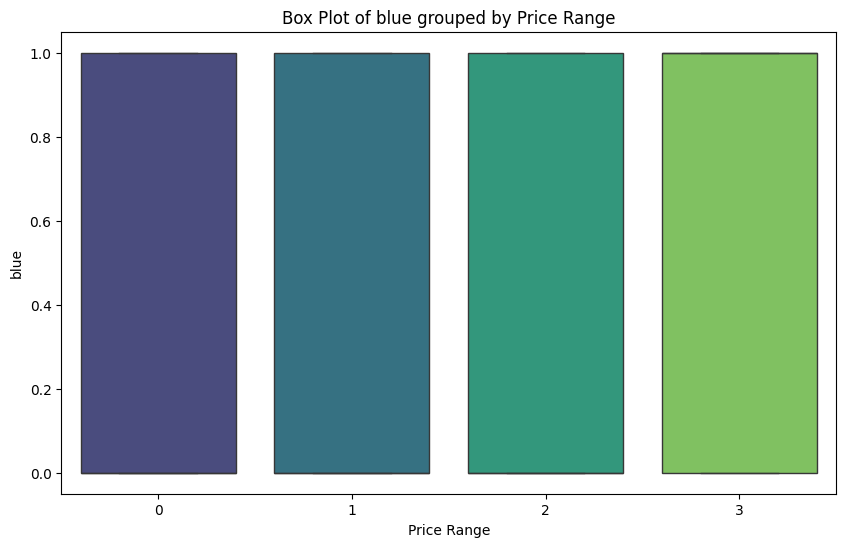

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


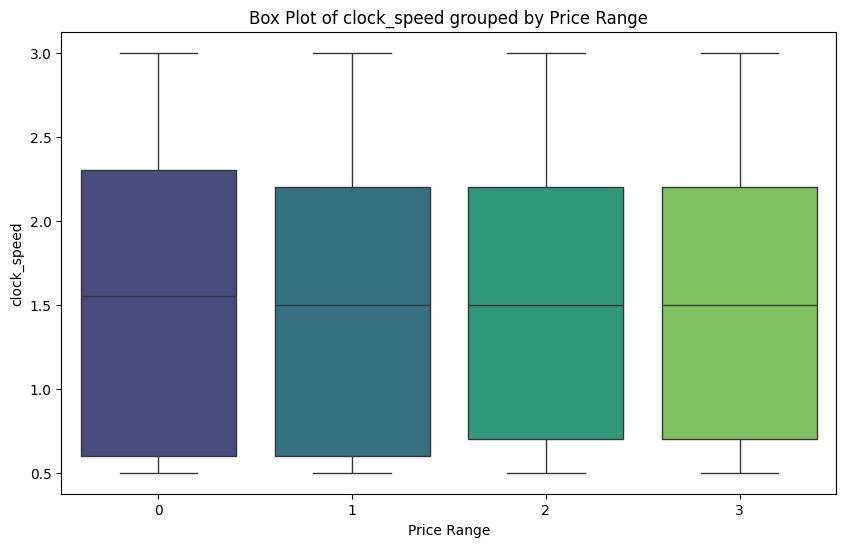

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


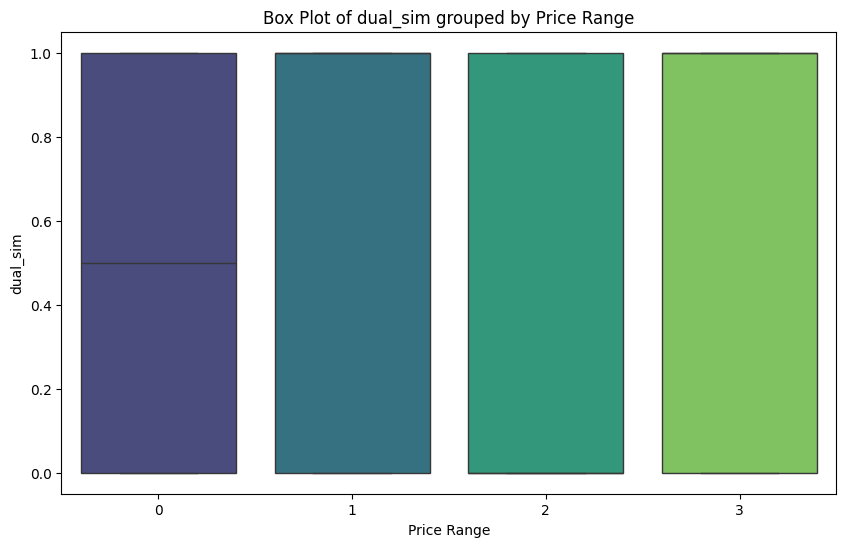

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


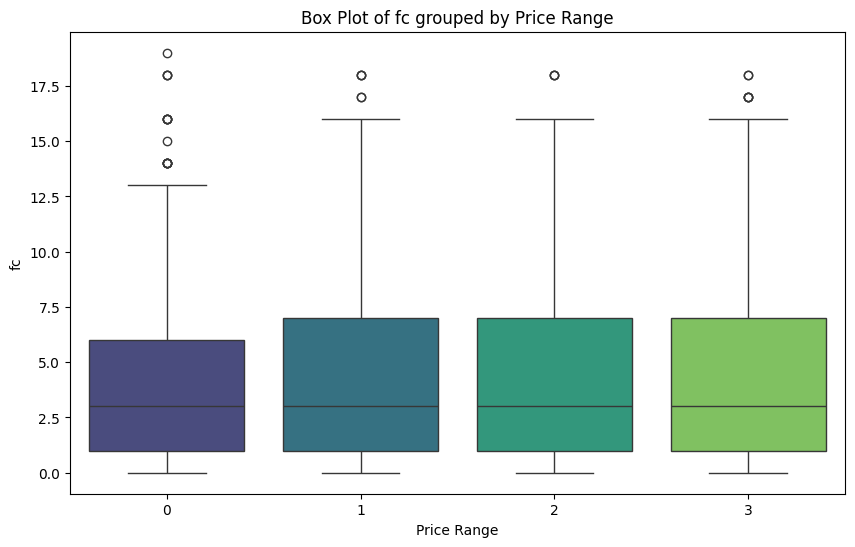

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


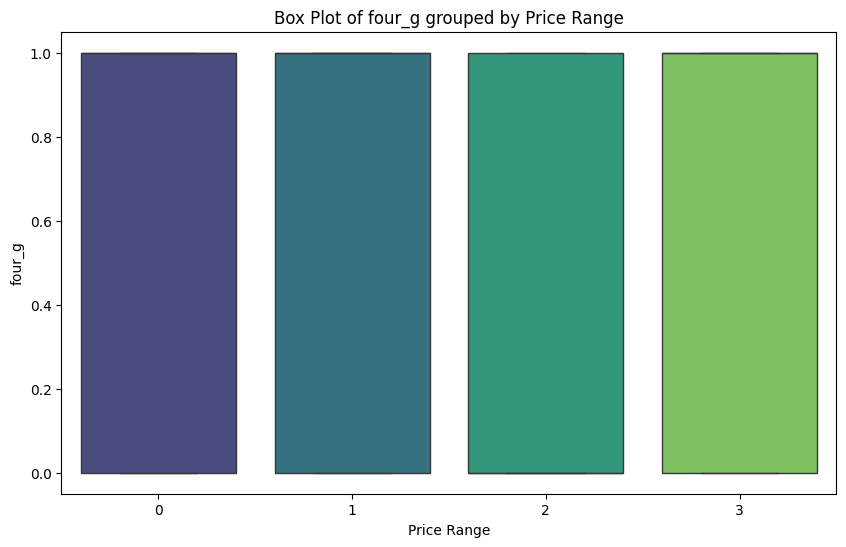

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


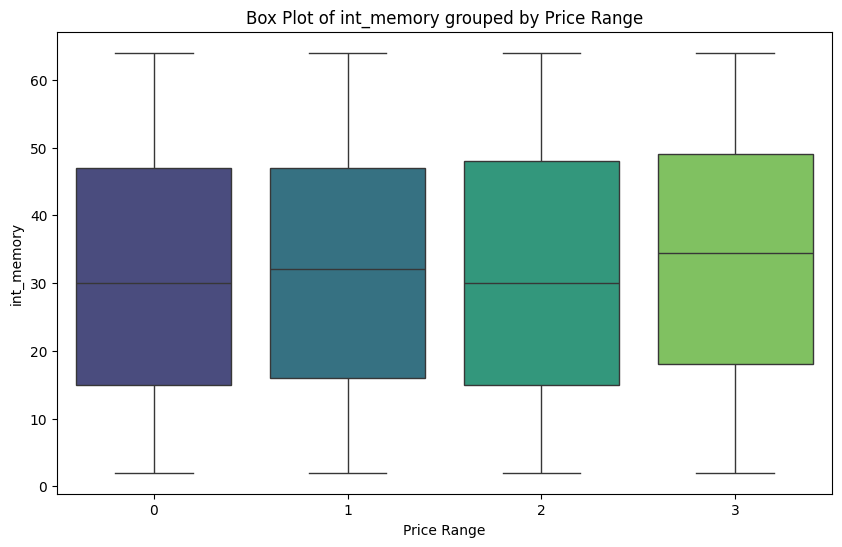

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


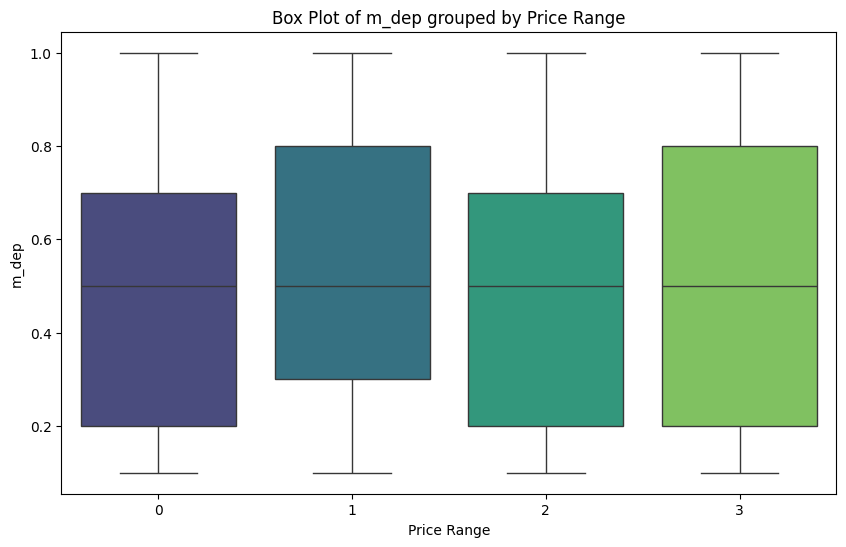

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


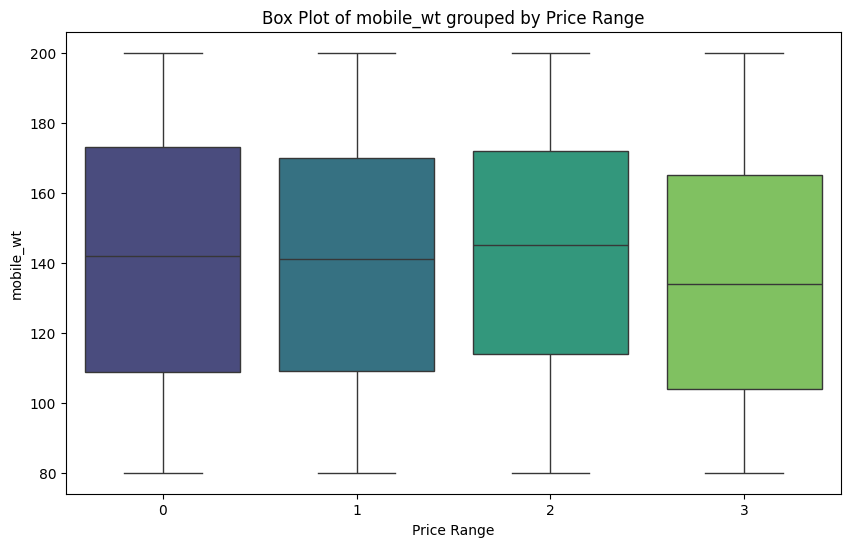

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


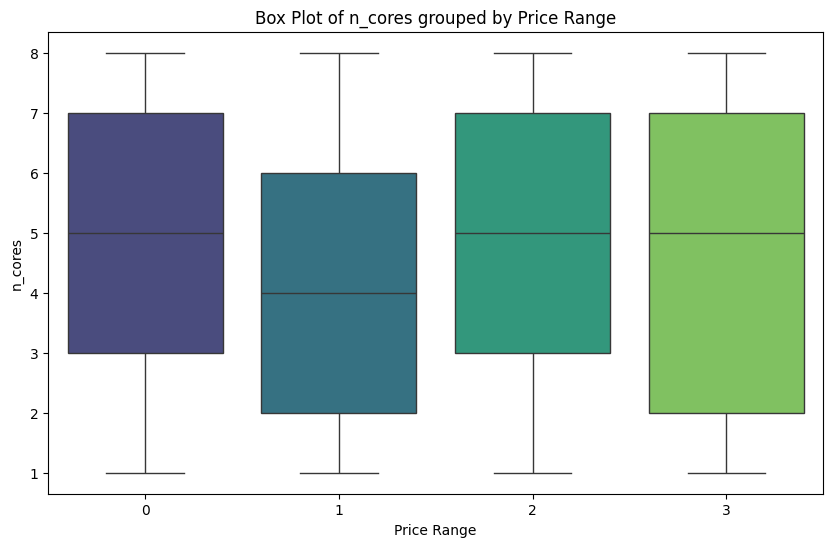

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


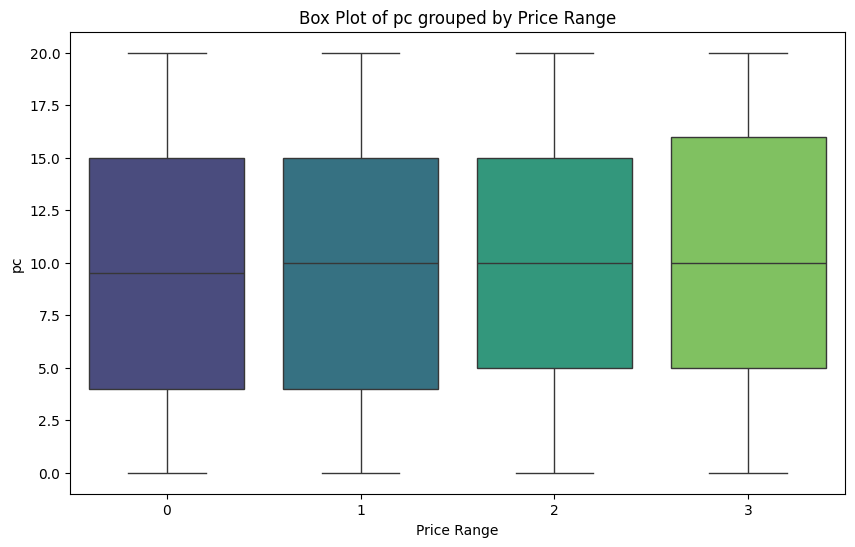

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


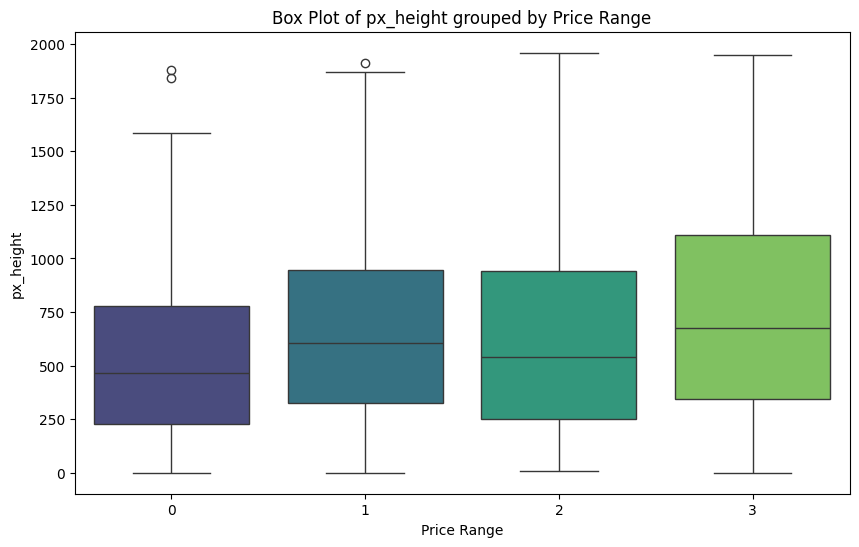

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


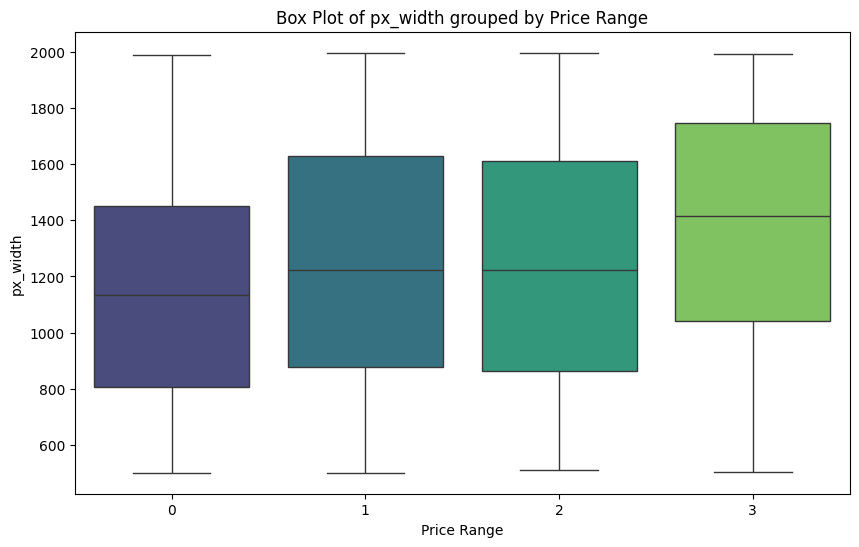

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


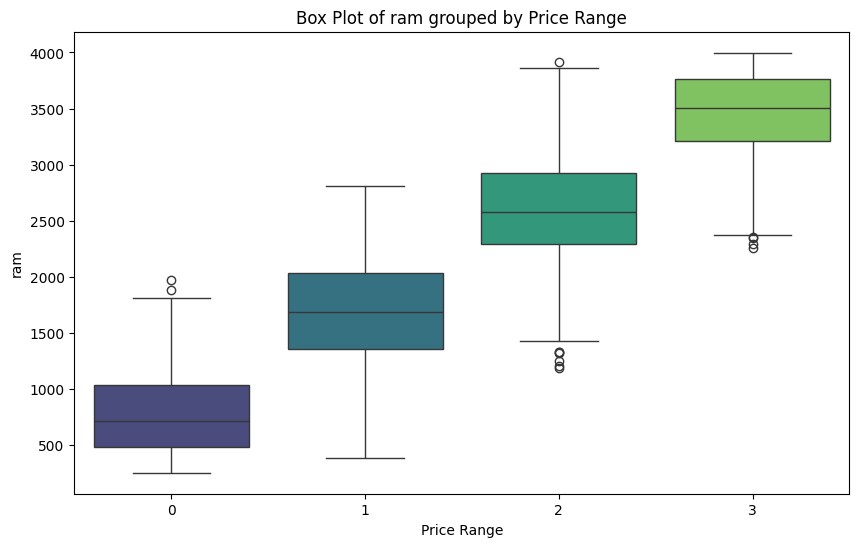

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


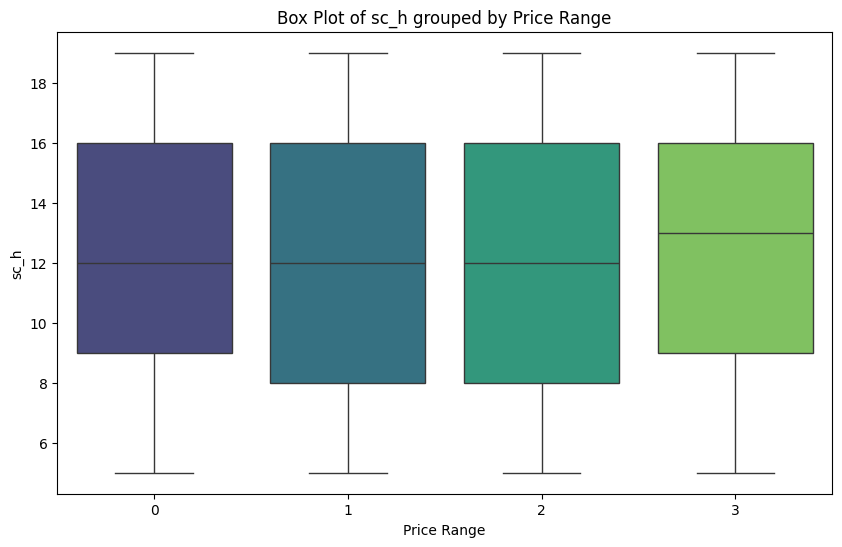

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


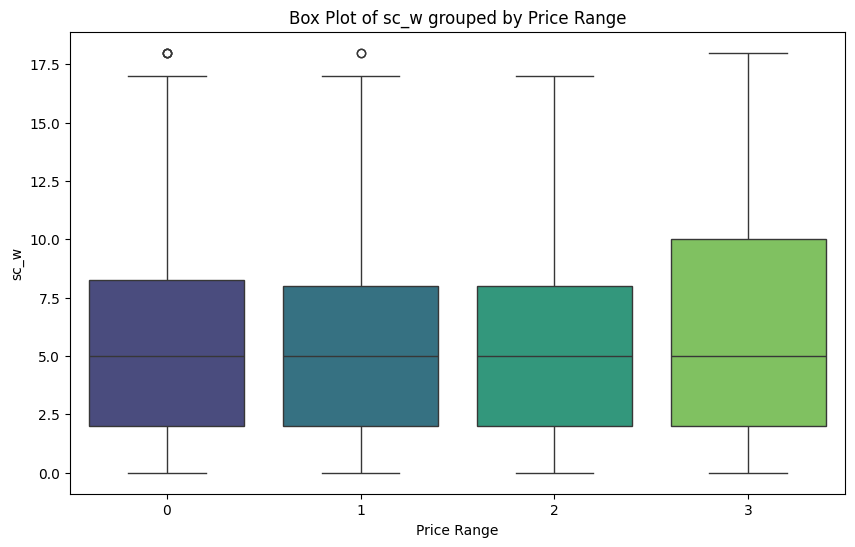

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


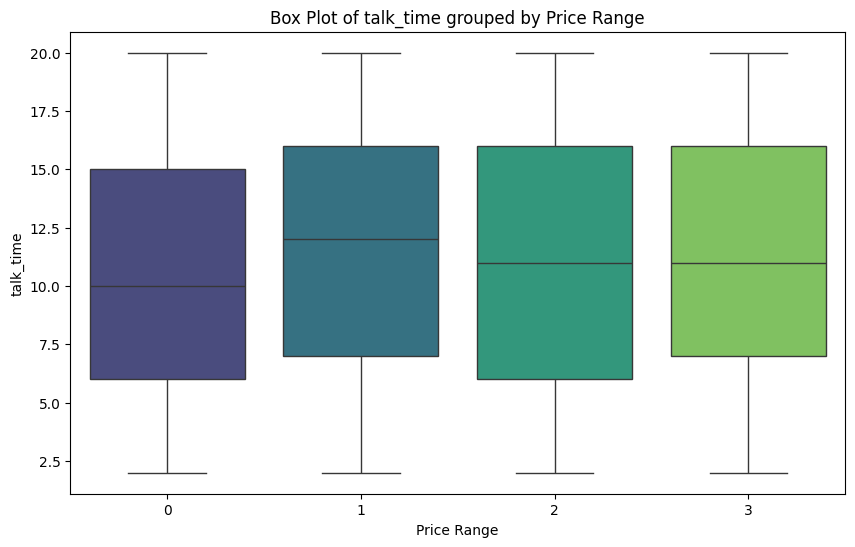

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


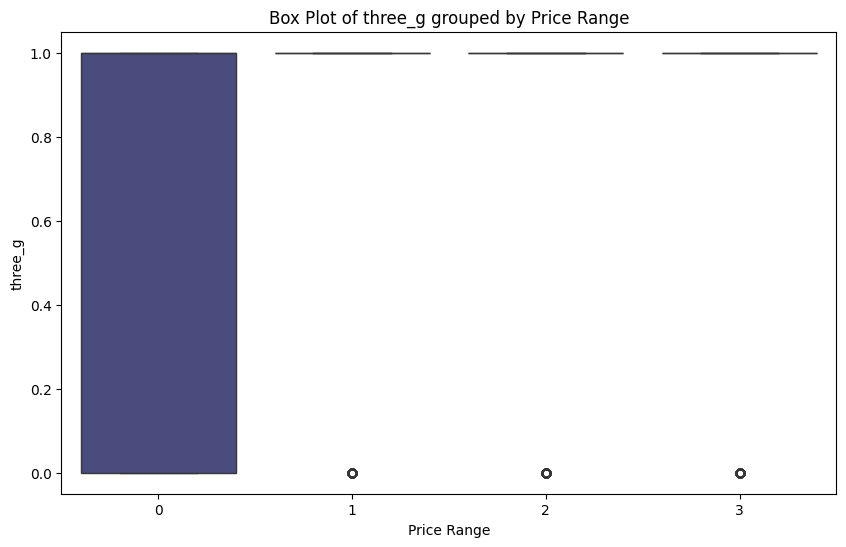

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


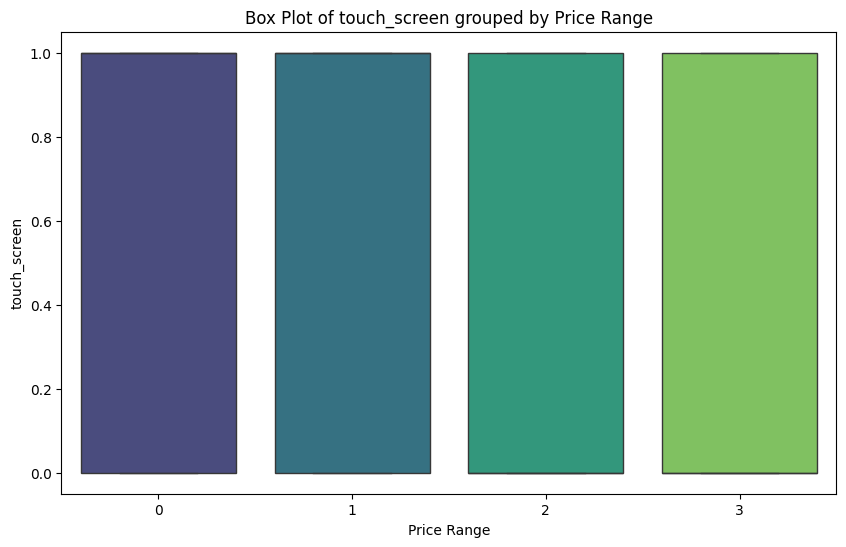

<ipython-input-3-56b7cf8a3d02>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y=col, palette='viridis')


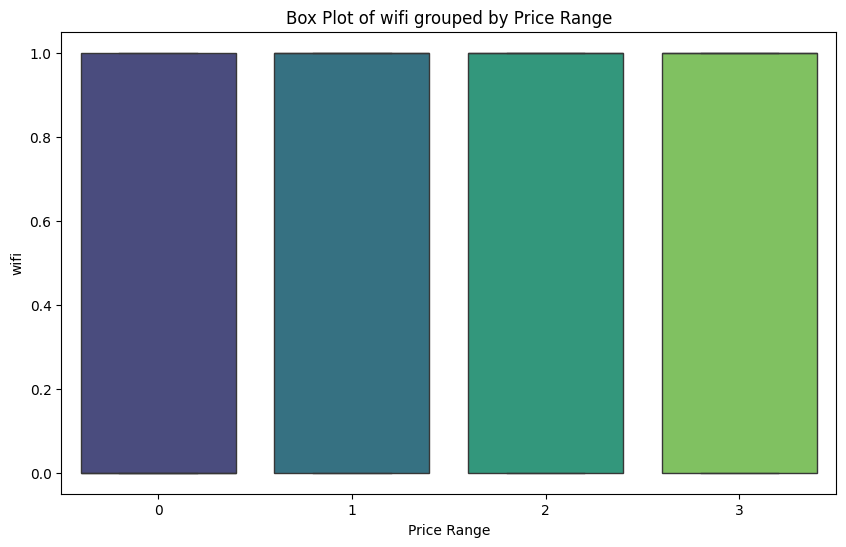

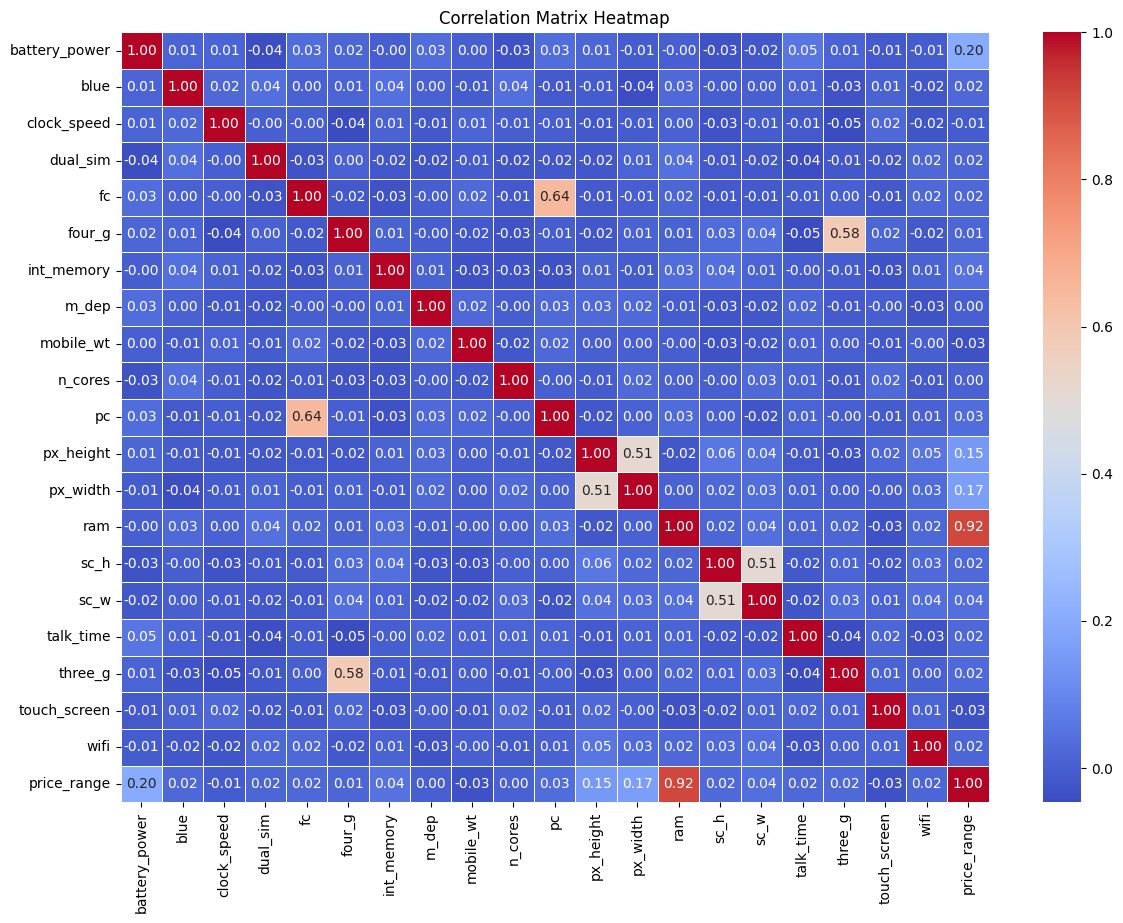

In [3]:
# Histograms
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Scatter Plots
for col in df.columns:
    if col != 'price_range':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col, y='price_range', hue='price_range', palette='viridis')
        plt.title(f'Scatter Plot of {col} vs Price Range')
        plt.xlabel(col)
        plt.ylabel('Price Range')
        plt.show()

# Box Plots
for col in df.columns:
    if col != 'price_range':
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='price_range', y=col, palette='viridis')
        plt.title(f'Box Plot of {col} grouped by Price Range')
        plt.xlabel('Price Range')
        plt.ylabel(col)
        plt.show()

# Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In examining mobile price classification, the story is clear: higher battery power, increased RAM, and larger internal memory are key drivers of higher prices. My analysis found that these hardware features strongly influence how much a mobile costs. Specifically, mobiles with more RAM and storage are priced higher, reflecting their greater capability.

Surprisingly, battery power also plays a bigger role in pricing than initially expected. On the other hand, features like dual SIM capability and connectivity options such as 4G and Wi-Fi seem to have a lesser impact on price. This narrative shows that when it comes to pricing, hardware specifications are more crucial than specific features.